In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline 

In [3]:
df=pd.read_csv("E:\Exam\Bengaluru_House_Data.csv")

In [4]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [5]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [6]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

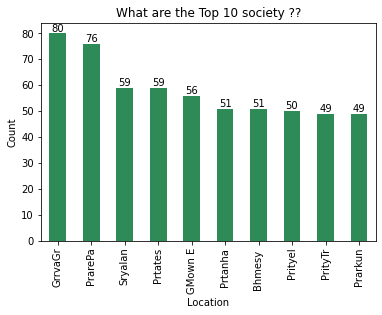

In [7]:


s = df['society'].value_counts().nlargest(10).plot(kind='bar', color='seagreen')

for p in s.patches:
    s.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', color='black')

plt.title('What are the Top 10 society ??')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()



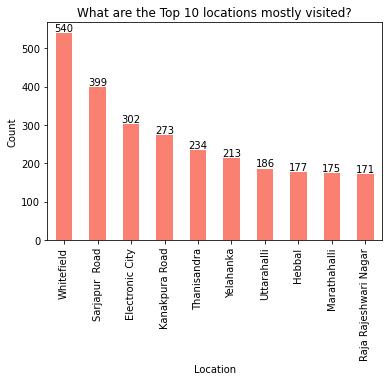

In [8]:


la = df['location'].value_counts().nlargest(10).plot(kind='bar', color='salmon') 

for p in la.patches:
    la.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', color='black')

plt.title('What are the Top 10 locations mostly visited?')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()



In [9]:
# Fill missing values in the 'size' column with the mean
df['size'].fillna(value=df['size'].mode(), inplace=True)

# Fill missing values in the 'bath' column using forward fill method
df['bath'].fillna(method='ffill', inplace=True)
df['balcony'].fillna(method='ffill', inplace=True)
# Drop columns 'society' and 'availability'
df = df.drop(columns=['society', 'availability','location'])

# Convert 'total_sqft' to float64
df['total_sqft'] = pd.to_numeric(df['total_sqft'], errors='coerce')

In [10]:
df.isnull().sum()

area_type       0
size           16
total_sqft    247
bath            0
balcony         0
price           0
dtype: int64

In [11]:
df.dropna(inplace=True)

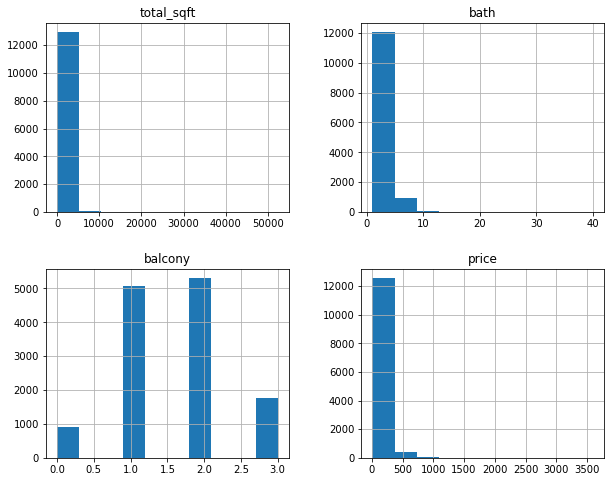

In [12]:


df.hist(figsize=(10,8))
plt.show()



In [13]:


df['size'].value_counts()



2 BHK         5148
3 BHK         4254
4 Bedroom      811
4 BHK          546
3 Bedroom      542
1 BHK          492
2 Bedroom      325
5 Bedroom      294
6 Bedroom      190
1 Bedroom      100
7 Bedroom       83
8 Bedroom       83
5 BHK           55
9 Bedroom       45
6 BHK           30
7 BHK           17
1 RK            12
10 Bedroom      12
9 BHK            7
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

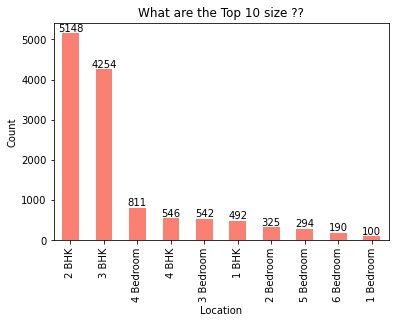

In [14]:


l = df['size'].value_counts().nlargest(10).plot(kind='bar', color='salmon') 

for p in l.patches:
    l.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', color='black')

plt.title('What are the Top 10 size ??')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()



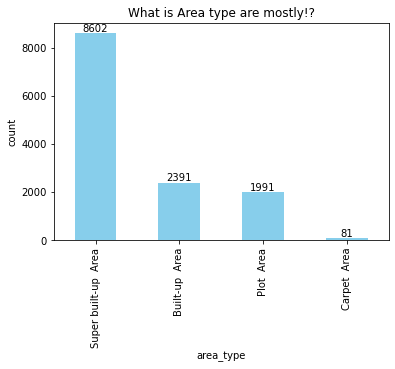

In [15]:
at=df['area_type'].value_counts().plot(kind='bar',color='skyblue')
for p in at.patches:
    at.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', color='black')

plt.title('What is Area type are mostly!?')
plt.xlabel('area_type')
plt.ylabel('count')
plt.show()

In [16]:


df.describe()



,total_sqft,bath,balcony,price
count,13065.000000,13065.000000,13065.000000,13065.000000
mean,1554.546892,2.691772,1.605741,112.514048
std,1238.422934,1.335653,0.805588,149.662725
min,1.000000,1.000000,0.000000,8.000000
25%,1100.000000,2.000000,1.000000,50.000000
50%,1275.000000,2.000000,2.000000,72.000000
75%,1670.000000,3.000000,2.000000,120.000000
max,52272.000000,40.000000,3.000000,3600.000000


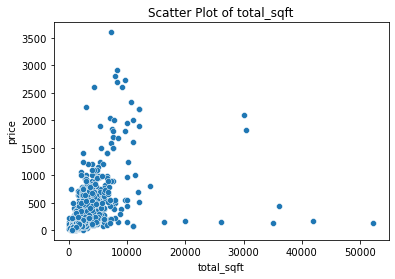

In [17]:


sns.scatterplot(x='total_sqft', y='price', data=df)  
plt.title('Scatter Plot of total_sqft')
plt.xlabel('total_sqft')
plt.ylabel('price')  
plt.show()



In [18]:


df.loc[df['total_sqft'] >= 10000, 'total_sqft'] = np.nan



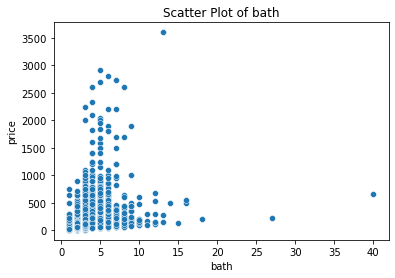

In [19]:


sns.scatterplot(x='bath', y='price', data=df)  
plt.title('Scatter Plot of bath')
plt.xlabel('bath')
plt.ylabel('price')  
plt.show()



In [20]:
df.loc[df['bath'] >= 17.5, 'bath'] = np.nan

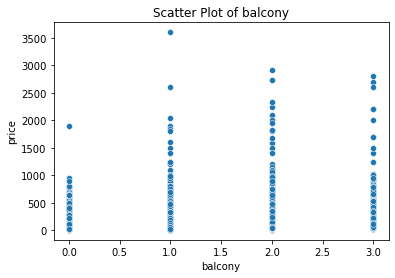

In [21]:


sns.scatterplot(x='balcony', y='price', data=df)  
plt.title('Scatter Plot of balcony')
plt.xlabel('balcony')
plt.ylabel('price')  
plt.show()



In [23]:


df.drop(columns='area_type', inplace=True)




In [24]:


df.drop(columns='size', inplace=True)



In [25]:
df

,total_sqft,bath,balcony,price
0,1056.0,2.0,1.0,39.07
1,2600.0,5.0,3.0,120.00
2,1440.0,2.0,3.0,62.00
3,1521.0,3.0,1.0,95.00
4,1200.0,2.0,1.0,51.00
...,...,...,...,...
13315,3453.0,4.0,0.0,231.00
13316,3600.0,5.0,0.0,400.00
13317,1141.0,2.0,1.0,60.00
13318,4689.0,4.0,1.0,488.00


In [26]:
df.isnull().sum()

total_sqft    27
bath           3
balcony        0
price          0
dtype: int64

In [27]:
df.dropna(inplace=True)

In [28]:
df['sqft_price']=df['total_sqft']*df['price']

In [29]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

In [30]:


df=df_scaled.copy()



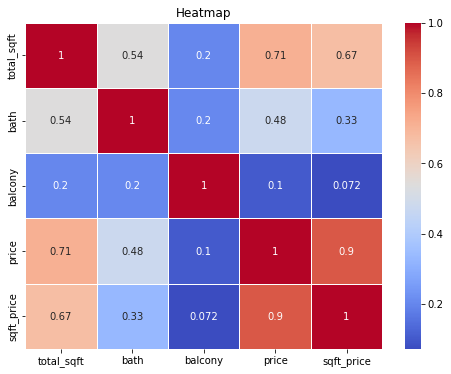

In [31]:


correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap')
plt.show()



In [32]:
X = df.drop(['price'],axis='columns')
y = df.price

In [33]:


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)



In [34]:


from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()



In [35]:


lr_clf.fit(X_train,y_train)



LinearRegression()

In [36]:


lr_clf.score(X_train,y_train)



0.8474550965409182

In [37]:


y_pred=lr_clf.predict(X_test)



In [38]:


result_df = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
result_df



,Actual,Predicted
0,0.010301,0.014652
1,0.042873,0.036011
2,0.030624,0.028602
3,0.021896,0.019479
4,0.036192,0.038548
...,...,...
2602,0.049276,0.035508
2603,0.007238,0.014829
2604,0.013641,0.015241
2605,0.022829,0.019447


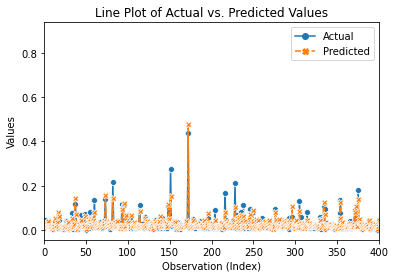

In [39]:
sns.lineplot(data=result_df, markers=True)
plt.xlabel('Observation (Index)')
plt.ylabel('Values')
plt.xlim(0,400)
plt.title('Line Plot of Actual vs. Predicted Values')
plt.show()

In [40]:


from sklearn.metrics import mean_squared_error ,mean_absolute_error,r2_score
acc = mean_absolute_error(y_pred,y_test)
print("Mean Absolute Error is: ",acc )
score=r2_score(y_pred,y_test)
print("R-squared (coefficient of determination) score is : {:.2f}%".format(score * 100))
score=lr_clf.score(X_train,y_train)
print("Accuracy for Training: {:.2f}%".format(score * 100))
score=lr_clf.score(X_test,y_test)
print("Accuracy for Testing: {:.2f}%".format(score * 100))



Mean Absolute Error is:  0.007943485946466777
R-squared (coefficient of determination) score is : 81.17%
Accuracy for Training: 84.75%
Accuracy for Testing: 84.86%
